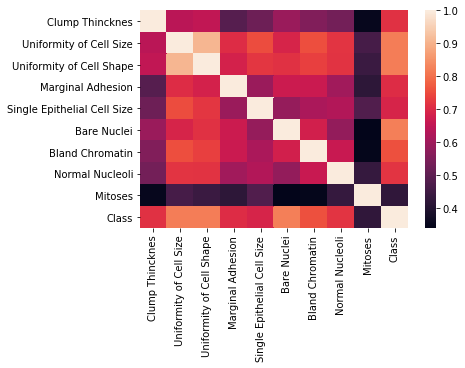

-----
-----


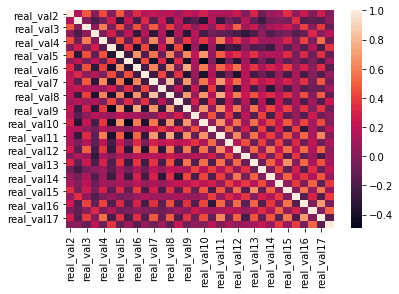

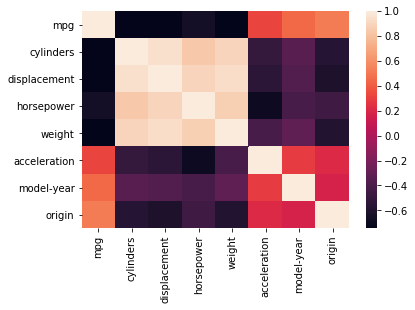

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%run Preprocessing_BCW_Data.ipynb
%run Preprocessing_Adult_Data.ipynb
%run Preprocessing_Ionosphere_Data.ipynb
%run preprocessing_mpg_dataset.ipynb

In [2]:
class GaussianNaiveBayes:

    def fit(self, X, y):
        # gets classes, then # of classes
        self.targets = np.unique(y)
        targets_count = len(self.targets)
        # gets number of samples, number of features
        samples_count, features_count = X.shape
        
        #init mean, std, priors
        self.mean = np.zeros((targets_count, features_count))
        self.std = np.zeros((targets_count, features_count))
        self.priors = np.zeros((targets_count))
        
        #for each class
        for t in self.targets:
            samples_of_class = X[t==y]
            #fills the row of the class, all columns, fills with mean
            self.mean[t,:] = samples_of_class.mean(axis=0)
            #fills the row of the class, all columns, fills with variance
            self.std[t,:] = samples_of_class.std(axis=0)
            #fills the row of the class, get # of samples with label c / total samples
            self.priors[t] = samples_of_class.shape[0] / (samples_count)

    def predict(self, X):
        # predicts for each x in X, returns it
        predictions = [self.predict_individual(x) for x in X]
        return predictions
    
    def predict_individual(self, x):
        # this is where we will store the prob of each target
        target_probs = []

        # calculate probability for each target, given x
        for i in range(len(self.targets)):
            # weve already calculated this, put it in a log function
            prior = np.log(self.priors[i])
            # call helper to apply log to all probabilities and add them together
            posterior = prior + np.sum(np.log(self.prob_function(i, x)))
            #add it to the array, this is the prob that with the given characterics we will get this class
            target_probs.append(posterior)
            
        # return most likely target
        return self.targets[np.argmax(target_probs)]
    
    # helper to do the complicated function for naive bayes from class
    def prob_function(self, i, x):
        return (np.exp(- (x-self.mean[i])**2 / (2 * (self.std[i]**2)))) / (np.sqrt(2 * np.pi * (self.std[i]**2)))
    
    # this calculates how many we got right
    def evaluate_acc(self, true_y, target_y):
        return (np.sum(true_y == target_y) / len(true_y))



In [3]:
def kFoldCrossVal(k, X, y):
    accuracy = 0
    model = GaussianNaiveBayes()
    size = (int)(len(y)/k)
    for i in range(k):
        train_x = X[np.r_[0:size*i, size*(i+1):]]
        train_y = y[np.r_[0:size*i, size*(i+1):]]
        test_x = X[(i*size):size*(i+1)]
        test_y = y[(i*size):size*(i+1)]
        
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        run_accuracy = model.evaluate_acc(test_y, predictions)
        accuracy = accuracy + run_accuracy

    return accuracy / k

# in order, these are the adult, ionosphere, mpg, and breast cancer datasets
# only run one at a time


# features = df.drop(['salary'] , axis=1)
# X = features.values
# output = df['salary']
# y = output.values

# features = df_ion.drop(['classification'] , axis=1)
# X = features.values
# output = df_ion['classification']
# y = output.values

features = DataFrame.drop(['mpg'] , axis=1)
X = features.values
output = DataFrame['mpg']
y = output.values

# features = df_bcw.drop(['Class'] , axis=1)
# X = features.values
# output = df_bcw['Class']
# y = output.values

#This is the code for different sized datasets, takes 10%, 20%, ..., 100%
# accuracy_vals = []
# size_of_dataset = []
# for i in range(1,11):
#     feats = X[:int(i*(len(y)/10))]
#     outputs = y[:int(i*(len(y)/10))]
#     accuracy = kFoldCrossVal(5, feats, outputs)
#     print(accuracy, len(outputs))
#     accuracy_vals.append(accuracy)
#     size_of_dataset.append(len(outputs))
    
# plt.plot(size_of_dataset, accuracy_vals,'-ro')
# plt.xlabel('Size of the Data Set')
# plt.ylabel('Accuracy Values')
# plt.show()

# this is where we do k fold cross validation
kFoldCrossVal(5, X, y)


0.8846153846153845

In [ ]:
#Run above block for task 3